# Vistazo a películas

## David Guzmán


Supón que trabajas en una empresa cinematográfica y tu gerente te encargó hacer unos análisis simples de las películas que están disponibles en cartelera. Lo único que tienes a tu disposición es un archivo con información de IMDB que alguien descargó para ti. 

Tu gerente te pidió que le respondas, de las películas disponibles esta semana:
- ¿Cuántas películas hay por clasificación ("rated")? 
- ¿Cuántas actrices/actores estelares hay en total en todas esas películas?¿Hay alguien actuando en más de una película esta semana?
- ¿Cuál es el promedio simple y ponderado por votos del `imdb_rating` para las películas en cartelera?
- ¿Están relacionados los ratings con el número de votos? Haz una gráfica y saca el coeficiente de correlación

También te advirtió que a veces el equipo de programadores no descargan bien la información, así que ten cuidado con el contenido de los archivos que manejas.

El archivo que necesitas está en Teams, bájalo ponlo en una carpeta con el mismo nombre `movie_data.json`.

In [ ]:
# Sólo haz esto si estás usando google colab
from google.colab import drive
drive.mount('/content/drive/')
import os
os.chdir("/content/drive/MyDrive")


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import json
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
## Corre esto para abrir el archivo con la información de películas
with open("/content/movie_data.json", 'r') as f:
    d = json.load(f)

In [ ]:
d

# Primera pregunta
- ¿Cuántas películas hay por clasificación ("rated") ?
- Genera una gráfica que muestra en orden ascendente o descendente el número de pelicular por valor "rated"

In [ ]:
def cuenta_por_clasificacion(d):
    '''
    calcula la cuenta de peliculas de cada clasificación
    
    input:
    d, un diccionario con la informacion de las películas 
    descargada de IMDB
    
    output:
    clasificaciones, un diccionario con tipos de clasificación
    como llaves y la cuenta de películas de cada clasificación
    como valor, ej:{"R": 12, "PG-13":5}
    '''
    clasificaciones = {}

    for i in d:
        value = d.get(i).get('rated')
        if value is not None:
            if value in clasificaciones:
                clasificaciones[value] += 1
            else:
                clasificaciones[value] = 1

    return clasificaciones

def ordena_diccionario(datos_dict, descendente=True):
    """
    Toma un diccionario y genera una lista con categorias y una lista con valores
    en el orden que se determina. Por ejemplo, de este diccionario:

    {"A": 1, "B": 5, "C": 3, "D", 2}

    se generarían dos listas

    ordered_clasifs = ["B", "C", "D", "A"]
    ordered_values = [5,3,2,1]

    input: 
    datos: Un diccionario de datos
    descendente: un booleano que indica si es descendente o ascendente el orden
    
    ouput:
    ordered_clasifs
    ordered_values 
    """
    #your code here

    lista = sorted(list(datos_dict.items()), key = lambda x: x[1], reverse = descendente)
    ordered_clasifs = []
    ordered_values = []
    
    for i in lista:
        ordered_clasifs.append(i[0])
        ordered_values.append(i[1])


    return ordered_clasifs, ordered_values

def grafica_datos(datos, descendente):
    """
    grafica datos
    
    input:
    datos, un diccionario con valores k, v donde
    v es una cuenta y k son ciertos nombres. 
    P.ej.: {"R": 12, "PG-13":5}
    ascendente, un booleano para identificar si queremos
    graficar en orden ascendente o descendente
    """
    listas = ordena_diccionario(datos, descendente)
    ordered_clasifs = listas[0]
    ordered_values = listas[1]
    # https://matplotlib.org/3.1.1/gallery/ticks_and_spines/custom_ticker1.html#sphx-glr-gallery-ticks-and-spines-custom-ticker1-py
    x_vals = range(1,len(ordered_values)+1)
    plt.bar(x_vals, ordered_values)
    plt.xticks(x_vals, ordered_clasifs)
    plt.xlabel("Clasificación")
    plt.ylabel("cuenta")
    plt.show()

{'PG': 4, 'N/A': 11, 'PG-13': 5, 'R': 6, 'Not Rated': 3, 'TV-14': 1, 'G': 1}


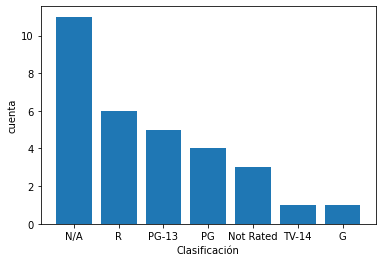

In [ ]:
clasifs = cuenta_por_clasificacion(d)
print(clasifs)
grafica_datos(clasifs, descendente=True)

# Segunda pregunta
- ¿Cuántas actrices/actores estelares hay en total en todas esas películas?
- Primero completa la función que cuenta en cuantas películas sale cada actor/actriz, luego completa la función que sólo filtra los que salen en más de x peliculas

In [ ]:
def cuenta_por_acts(d):
    '''
    calcula la cuenta de peliculas que protagoniza un actor
    
    input:
    d, un diccionario con la informacion de las películas 
        descargada de IMDB
    
    output:
    clasificaciones, un diccionario con nombres de actrices/actores
        como llaves y la cuenta de películas que protagonizan como valor
        P.ej:{'K.J. Apa': 1, 'Britt Robertson': 1,...}
    '''
    acts = {}
   
    for i in d:
        value = d.get(i).get('actors')
        if value is not None:
            actores = value.split(', ')
            for actor in actores:
                if actor in acts:
                    acts[actor] += 1
                else:
                    acts[actor] = 1

    return acts

def mas_de_x_peliculas(d, x):
    '''
    verifica los actores que aparecen en mas de x peliculas
    
    input:
    d, un diccionario con actores y su cuenta de peliculas 
        protagonizadas
    
    output:
    x, el número de películas minimo para considerar en el output
    output:
    Regresa una lista sólo con los nombres de actores/actrices con 
    más de x películas
    '''
    lista = [i for i in d if d.get(i) > x]

    return lista



In [ ]:
d_by_act = cuenta_por_acts(d)
mas_de_x_peliculas(d_by_act, 1)

['Daniel Radcliffe']

# Tercera pregunta
- Cuál es el promedio simple del `imdb_rating` para las películas en cartelera, y el promedio ponderado por el número de votos?
- Si el valor del rating es "N/A", omite esa película para el promedio

In [ ]:
def promedio_rating(d, ponderado=True):
    '''
    calcula promedio simple o ponderado

    input:
    d, un diccionario con la informacion de las películas 
        descargada de IMDB
    ponderado, un booleano si se pondera o no el promedio
    
    output:
    avg_rating, promedio final 
    '''
    tot_rating = 0
    tot_movies = 0
    tot_votes = 0
    tot_rating_by_votes = 0

    rating = []
    votes = []
    for movie in d.values():
        
        imdb_rating = movie.get("imdb_rating", None)
        imdb_votes  = movie.get("imdb_votes", None)
        rating.append(imdb_rating)
        votes.append(imdb_votes)
        #print (imdb_rating, imdb_votes)

    lista = ['N/A', None]  

    rating = list(filter(lambda x: x not in lista, rating))
    votes = list(filter(lambda x: x not in lista, votes))

    rating = [float(i) for i in rating]
    votes = [int(i.replace(',','')) for i in votes]

    if ponderado:
        for i in range(len(rating)):
            tot_rating_by_votes += rating[i] * votes[i]
            tot_votes += votes[i]
        
        avg_rating = tot_rating_by_votes / tot_votes
    
    else:
        tot_movies = len(rating)
        for i in range(tot_movies):
            tot_rating += rating[i]  
        
        avg_rating = tot_rating / tot_movies
        
    return avg_rating

In [ ]:
print("Ponderado:", round(promedio_rating(d), 6))
print("No ponderado:", round(promedio_rating(d, ponderado=False), 6))

Ponderado: 6.724887
No ponderado: 5.989286


# Cuarta Pregunta
Obten el índice de correlación entre dos variables

In [ ]:
def is_valid(value):
    '''
    This is a helper function to define if a dict value is valid.
    Return False if the value is:
    - "N/A", "na"
    - the value None
    - an empty string
    Otherwise, return False
    '''
    if value == 'N/A':
        return False
    if value is None:
        return False
    return True

def correlacion(d, value_a, value_b):
    """
    calcula coeficiente de correlación
    
    input:
    d, un diccionario con la informacion de las películas 
        descargada de IMDB
    value_a/b, strings que indican los valores del diccionarios para los que quieres calcular el índice
   
    output:
    pearsonr, coeficiente de correlación
    Puedes usar:
    https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html
    
    """
    from scipy.stats import pearsonr
    values_a = []
    values_b = []

    for movie in d.values():
        imdb_rating = movie.get(value_a, None)
        imdb_votes  = movie.get(value_b, None)
        values_a.append(imdb_rating)
        values_b.append(imdb_votes)
    
    values_a = list(filter(is_valid, values_a))
    values_b = list(filter(is_valid, values_b))

    values_a = [float(i) for i in values_a]
    values_b = [int(i.replace(',','')) for i in values_b]
   
    
    return pearsonr(values_a, values_b)[0]



In [ ]:
correlacion(d, "imdb_rating","imdb_votes")

0.44693018350630465